# A Software Solution for Optimal System Parameter Selection and Resource Utilization Using Queueing Theory/SysOptParam

## Single-Server Queuing System

The single-server queuing system (Fig. 1) will be used as the basic element to evaluate and to optimize more complicated systems.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/65/Mm1_queue.svg/1920px-Mm1_queue.svg.png" width="400">

In many applications there is a process when some entities (depending on use case the entities may be "users", "requests", "tasks", "data packets" or other.) arrive to the system and wait in a queue while being served. Therefore, queueing systems and queueing theory can be used in various industries such as telecommunications, customer service, healthcare, traffic-management, manufacturing and other.  

In queueing theory the queueing systems are denoted by Kendall's notations: $A/B/c/K$, where $A$ - denotes the distribution of inter-arrival time, $B$ - denotes the distribution of service time, $c$ - denotes number of servers, and $K$ - denotes the capacity of queue (now presented if $K=\infty$). 

To denote the type of inter-arrival and service time distributions such letters are used: $M$ - for exponential distribution (stands for Markov), $D$ - for deterministic or fixed time, $G$ - for general distribution (defined by mean and variance). For example, $M/D/1$ queueing system means that distribution of inter-arrival times is exponential ($M$), distribution of service time is deterministic ($D$), it has $1$ server and the queue capacity is infinite. 

In this software the formulas of $G/G/1$ queueing system will be used, allowing for more flexibility in modeling real-world scenarios where inter-arrival and service times may not follow standard distributions. 

The actual mean waiting time in queue is obtained by Marchall’s approximation
$$W_q = \frac{\rho \cdot s}{2(1-\rho)} \cdot \left( \frac{v_a+v_d}{s^2} \right) \cdot \left( \frac{s^2+v_d}{a^2+v_d} \right )$$
where:
- $a$ - the mean inter-arrival time; 
- $s$ - the mean service time; 
- $v_a$ - variance of the inter-arrival times;
- $v_s$ - the variance of the service time distribution;
- the utilization of the system
$$ \rho = \frac{\lambda}{\mu}; $$
- the arrival rate
$$ \lambda = 1/a; $$ 
- the service rate
$$ \mu = 1/s. $$

The mean total time in the system:
$$ W = s + W_q. $$

The mean number of entities in the queue is calculated using Little's formula:
$$ L_q = \lambda \cdot W_q. $$

The mean number of entities in the system:
$$ L = \lambda \cdot W. $$

The model is considered stable only if $\lambda < \mu$ or $\rho < 1$. 





In [126]:
import numpy as np
import matplotlib.pylab as plt

def ssqs(**parameters):
    """Function calculates parameters of various single server queueing systems.

    Queueing system is stable when arrival rate is less than service rate.
    Exeptions will be raised if parameters are wrong or missing.
    Some input parameters are optional or calculated automaticaly according selected system type.

    Parameters
    ----------
    **parameters : (keyword arguments)
    qs : str
        Type of queueing system according Kendall's notations:
        "MM1", "MD1", "MG1", "DM1","DG1","DD1","GM1","GD1". Defaults "MM1".
        Examples of accepted formats: "mm1", "MM1", "m/m/1", "M/M/1" 
    ar : float
        Arrival rate. Optional if mean inter-arrival time is given.   
    sr : float
        Service rate. Optional if mean service time is given.
    a : float
        Mean inter-arrival time. Optional if arrival rate is given.
    s : float
        Mean service time. Optional if service rate is given.
    va : float
        Variance of inter-arrival time. Must be provided only for "GM1","GD1","GG1" type systems.
    vs : float
        Variance of service time. Must be provided only for "MG1","DG1","GG1" type systems.

    Returns
    -------
    result : dictionary with such keys
    'qs' - queueing system notation
    'w' - the mean total time in system
    'wq' - the mean waiting time in queue
    'u' - the utilization of the system
    'ar' - arrival rate
    'sr' - service rate
    'l' - mean number of entities in the system
    'lq' - mean number of entities in the queue
    'a' - mean inter-arrival time
    's' - mean service time
    'va' - variance of inter-arrival time
    'vs' - variance of service time

    Example
    -------
    >>> result = ssqs(qs='gg1',ar=10,va=0,s=0.01,vs=0.04)
    >>> print(result)
    >>> {'qs': 'gg1', 'w': 0.18822222222222224, 'wq': 0.17822222222222223, 'u': 0.1, 'ar': 10.0, 'sr': 100.0, 
    'l': 1.8822222222222225, 'lq': 1.7822222222222224, 'a': 0.1, 's': 0.01, 'va': 0, 'vs': 0.04} 
    """

    # -------------------------------------------------------------------
    qs = None
    a = None
    s = None
    va = None
    vs = None
    ar = None

    if "qs" in parameters:
        qs = parameters.get("qs")

    if qs is None:
        qs = "mm1"    

    qs_f = qs.replace("/", "")
    qs_f = qs_f.upper()

    # Arrival parameters -----------------------------------------------
    # arrival rate
    if "ar" in parameters:
        ar = parameters.get("ar")
    # mean inter-arrival time
    if "a" in parameters:
        a = parameters.get("a")
    # variance of inter-arrival times
    if "va" in parameters:
        va = parameters.get("va")

    # Service parameters ---------------------------------------------
    # service rate
    if "sr" in parameters:
        sr = parameters.get("sr")
    # mean service time
    if "s" in parameters:
        s = parameters.get("s")
        if s is not None:
            sr = 1/s
    # variance of service times
    if "vs" in parameters:
        vs = parameters.get("vs")

    # Verification ---------------------------------------------------
    if ar == 0:
        a = float('inf')
    else:
        a = 1 / ar
    if sr == 0:
        s = float('inf')
    else:
        s = 1 / sr    
    if qs_f[0] == "G" and va is None:
        raise Exception("Missing parameters. 'va' value is not provided")
    if qs_f[1] == "G" and vs is None:
        raise Exception("Missing parameters. 'vs' value is not provided")
    if qs_f[0] == "M":
        va = a ** 2
    if qs_f[1] == "M":
        vs = s ** 2
    if qs_f[0] == "D":
        va = 0
    if qs_f[1] == "D":
        vs = 0
    if qs_f[2] != "1":
        raise Exception("Uncompatble system notation")    
    if a is None and ar is not None:
        a = 1 / ar
    if a is None and ar is None:
        raise Exception("Missing parameters. 'ar' or 'a' values are not provided")
    if s is None and sr is not None:
        s = 1 / sr
    if s is None and sr is None:
        raise Exception("Missing parameters. 'sr' or 's' values are not provided")

    if s < 0 or a < 0:
        raise Exception("Negative parameters. Ensure that 'a' and 's' > 0")
    if qs_f[0] == "G" or qs_f[1] == "G":
        if vs < 0 or va < 0:
            raise Exception("Negative parameters. Ensure that 'va' and 'vs' > 0")
    if s >= a:
        raise Exception("Unstable system. Ensure that: 's' < 'a' or 'ar' < 'sr'")

    # Parameter calculation -----------------------------------------
    # The arrival rate
    ar = 1 / a
    # The service rate
    sr = 1 / s
    # The utilization of the system
    u = ar / sr
    # The mean waiting time in queue:
    if qs_f == "MM1":
        wq = (u * s)/(1 - u)
    elif qs_f == "MD1":
        wq = (u * s)/(2*(1 - u))
    else:
        # The actual mean waiting time in queue is obtained by Marchal’s approximation
        wq = (u * s) / (2 * (1 - u)) * ((va + vs) /
                                        (s ** 2)) * ((s ** 2 + vs) / (a ** 2 + vs))
    # The mean total time in system
    w = wq + s
    # The mean number of entities in the system
    l = ar * w
    # The mean number of entities in the queue
    lq = ar * wq
    result = {"qs": qs, "w": w, "wq": wq, "u": u, "ar": ar,
              "sr": sr, "l": l, "lq": lq, "a": a, "s": s, "va": va, "vs": vs}
    return result

def msqs(ar, sn, qs=None, sr1=None, s1=None, vs=None):
    """Multi server queueing system. 

    Arrival rate is distributed equaly upon arrival to the system between servers.
    Return contains parameters of a single server in the multiserver system.
    It is assumed that all servers in the system are equal.

    Parameters
    ----------
    ar : float
        Arrival rate.
    sn : int
        Number of servers
    sr1 : float, optional
        Single server service rate. Optional if s1 is given.
    qs : str, optional
        Type of queueing system according Kendall's notations. By default "MM1" or None
        With this function only such systems can be analysed: "MM1", "MD1", "MG1","DM1","DD1","DG1". Defaults "MM1".
        Examples of accepted formats: "mm1", "MM1", "m/m/1", "M/M/1" 
    s1 : float, optional    
        Mean service time in single server. Optional if sr1 is given.
    vs : float, optional
        Variance of service time. Must be provided only for "MG1" type system.    

    Returns
    -------
    result : list of dictionaries for each server with such keys:
    'qs' - queueing system notation
    'w' - the mean total time in system
    'wq' - the mean waiting time in queue
    'u' - the utilization of the system
    'ar' - arrival rate
    'sr' - service rate
    'l' - mean number of entities in the system
    'lq' - mean number of entities in the queue
    'a' - mean inter-arrival time
    's' - mean service time
    'va' - variance of inter-arrival time
    'vs' - variance of service time

    Example
    -------
    >>> result = msqs(ar=10, sn=5, sr1=4)
    >>> print(result)
    >>> {'qs': 'mm1', 'w': 0.5, 'wq': 0.25, 'u': 0.5, 'ar': 2.0, 'sr': 4.0, 'l': 1.0, 'lq': 0.5, 'a': 0.5, 's': 0.25, 'va': 0.25, 'vs': 0.0625}
    """
    if qs is None:
        qs = "mm1"    

    qs_f = qs.replace("/", "")
    qs_f = qs_f.upper()
    if (sr1 is None) and (s1 is None):
        raise Exception("Missing parameters: sr1 or s1 must be given.")
    
    if (sr1 is None) and (s1 is not None):
        sr1 = 1/s1

    if type(sn) != int or sn < 1:
        raise Exception("Wrong parameter: sn must be integer >= 1")

    if ar > sn*sr1:
        raise Exception("Unstable system: ar must be < sn*sr1")
    
    if qs[0] == "G" or qs[2]!="1":
        raise Exception('Wrong system type: only "MM1", "MD1", "MG1","DM1","DD1","DG1" are valid')

    result = ssqs(qs=qs, ar=ar/sn, sr=sr1, s=s1, vs=vs)
    return result

def msqsa(ar, pl, sl):
    """Advanced Multi server queueing system. 

    Arrival rate is distributed acording provided list of probabilities.
    All servers may be different. 
    
    Parameters
    ----------
    ar : float
        Arrival rate.
    pl : float, array like
        Array or List of probabilities arrival rate distribution between servers
    sl : dict
        List of server parameter dictionaries. Server parameters are the same as in ssqs.
   
    Returns
    -------
    result : list of dictionaries for each server with such keys:
    'qs' - queueing system notation
    'w' - the mean total time in system
    'wq' - the mean waiting time in queue
    'u' - the utilization of the system
    'ar' - arrival rate
    'sr' - service rate
    'l' - mean number of entities in the system
    'lq' - mean number of entities in the queue
    'a' - mean inter-arrival time
    's' - mean service time
    'va' - variance of inter-arrival time
    'vs' - variance of service time

    Example
    -------
    >>> pl = [0.4,0.6]
    >>> sl = [{'qs':'md1','sr':1},{'qs':'mg1','sr':1,'vs':0.1}]
    >>> result = msqs2(ar=1,pl=pl,sl=sl)
    >>> print(result) 
    >>> [{'qs': 'md1', 'w': 1.5, 'wq': 0.5, 'u': 0.5, 'ar': 0.5, 'sr': 1.0, 'l': 0.75, 
        'lq': 0.25, 'a': 2.0, 's': 1.0, 'va': 4.0, 'vs': 0, 'p': 0.5}, 
        {'qs': 'mg1', 'w': 1.5615, 'wq': 0.5615, 'u': 0.5, 'ar': 0.5, 'sr': 1.0, 
        'l': 0.78075, 'lq': 0.28075, 'a': 2.0, 's': 1.0, 'va': 4.0, 'vs': 0.123, 'p': 0.5}]  
    """
    if len(pl) != len(sl):
        raise Exception("Lengths of prob_list and server_list must be equal.")
    result = []
    for i in range(len(pl)):
        if pl[i]*ar < sl[i]["sr"]:
            params = sl[i]
            params['ar']=pl[i]*ar
            res = ssqs(**params)
            if sl[i].get("i") is not None:
                res["i"] = sl[i]["i"]
            if sl[i].get("c") is not None:
                res["c"] = sl[i]["c"] 
            if sl[i].get("r") is not None:
                res["tr"] = sl[i]["r"]*res["s"]/res["u"]    
            res["p"] = pl[i]
            result.append(res)
        else:
            print("System unstable: arrival rate > service rate")
    return result

result = ssqs(qs='gg1',ar=10,va=0,s=0.01,vs=0.04)
print(result)

pl = [0.4,0.6]
sl = [{'qs':'md1','sr':1},{'qs':'mg1','sr':1,'vs':0.1,'c':10,'i':"kuku"}]
res = msqsa(ar=1,pl=pl,sl=sl)
print(res)

# result = msqs(ar=10, sn=5, sr1=4)
# print(result)

import pandas as pd
df = pd.DataFrame(res)
df

ddd = []
df = pd.DataFrame()
for ar in range(80):
    res = msqsa(ar=ar,pl=[1],sl=[{'qs':'md1','sr':100}])
    ddd.append(res)
    df = pd.concat([df,pd.DataFrame(res)])

# print(ddd)
# df = pd.DataFrame(ddd[:][:])
df

{'qs': 'gg1', 'w': 0.18822222222222224, 'wq': 0.17822222222222223, 'u': 0.1, 'ar': 10.0, 'sr': 100.0, 'l': 1.8822222222222225, 'lq': 1.7822222222222224, 'a': 0.1, 's': 0.01, 'va': 0, 'vs': 0.04}
[{'qs': 'md1', 'w': 1.3333333333333335, 'wq': 0.33333333333333337, 'u': 0.4, 'ar': 0.4, 'sr': 1.0, 'l': 0.5333333333333334, 'lq': 0.13333333333333336, 'a': 2.5, 's': 1.0, 'va': 6.25, 'vs': 0, 'p': 0.4}, {'qs': 'mg1', 'w': 1.8249999999999997, 'wq': 0.8249999999999998, 'u': 0.6, 'ar': 0.6, 'sr': 1.0, 'l': 1.0949999999999998, 'lq': 0.4949999999999999, 'a': 1.6666666666666667, 's': 1.0, 'va': 2.777777777777778, 'vs': 0.1, 'i': 'kuku', 'c': 10, 'p': 0.6}]


,qs,w,wq,u,ar,sr,l,lq,a,s,va,vs,p
0,md1,0.010000,0.000000,0.00,0.0,100.0,0.000000,0.000000,inf,0.01,inf,0,1
0,md1,0.010051,0.000051,0.01,1.0,100.0,0.010051,0.000051,1.000000,0.01,1.000000,0,1
0,md1,0.010102,0.000102,0.02,2.0,100.0,0.020204,0.000204,0.500000,0.01,0.250000,0,1
0,md1,0.010155,0.000155,0.03,3.0,100.0,0.030464,0.000464,0.333333,0.01,0.111111,0,1
0,md1,0.010208,0.000208,0.04,4.0,100.0,0.040833,0.000833,0.250000,0.01,0.062500,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,md1,0.025000,0.015000,0.75,75.0,100.0,1.875000,1.125000,0.013333,0.01,0.000178,0,1
0,md1,0.025833,0.015833,0.76,76.0,100.0,1.963333,1.203333,0.013158,0.01,0.000173,0,1
0,md1,0.026739,0.016739,0.77,77.0,100.0,2.058913,1.288913,0.012987,0.01,0.000169,0,1
0,md1,0.027727,0.017727,0.78,78.0,100.0,2.162727,1.382727,0.012821,0.01,0.000164,0,1


Text(0.5, 0, 'arrival rate')

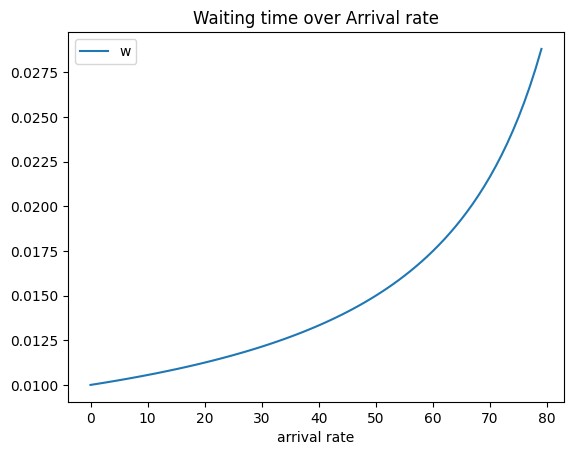

In [128]:
min_cols = ['w']
# min_cols = ['C_S','N_E','N_C','T_B']
#min_cols = ['C_S']
df_sorted = df.sort_values(by=min_cols, ascending=[True])
# df_sorted = df.sort_values(by=min_cols, ascending=[True])

df_sorted[(df_sorted["w"]>0.05) & (df_sorted["ar"]>0)]#.head(1)

df_sorted.plot(x='ar', y='w', kind='line', title='Waiting time over Arrival rate')
plt.xlabel("arrival rate")

In [151]:
d = [{"a":5}]
d
my_dict = {'key1': 'value1', 'key2': 'value2'}

def prep_list(data,N):
    return [data for _ in range(N)]

arrival_rate = 10
N = 5
prob = 1/N
server = {'sr':10}
# Create a list with five copies of the dictionary
# prob_list = [prob for _ in range(5)]
# server_list = [server for _ in range(5)]
prob_list = prep_list(1/N,N)
server_list = prep_list(server,N)

print(server_list)

res = msqsa(ar=arrival_rate,pl=prob_list ,sl=server_list)
res

df = pd.DataFrame(res)
print(df)
# df['w'].mean()
# df.mean()1

res = msqs(ar=arrival_rate,sn=10,s1=0.01)
print(res)

res = msqs(ar=arrival_rate,sn=10,sr1=5)
print(res)

df = pd.DataFrame(res, index=[0])
print(df)


[{'sr': 10}, {'sr': 10}, {'sr': 10}, {'sr': 10}, {'sr': 10}]
    qs      w     wq    u   ar    sr     l    lq    a    s    va    vs    p
0  mm1  0.125  0.025  0.2  2.0  10.0  0.25  0.05  0.5  0.1  0.25  0.01  0.2
1  mm1  0.125  0.025  0.2  2.0  10.0  0.25  0.05  0.5  0.1  0.25  0.01  0.2
2  mm1  0.125  0.025  0.2  2.0  10.0  0.25  0.05  0.5  0.1  0.25  0.01  0.2
3  mm1  0.125  0.025  0.2  2.0  10.0  0.25  0.05  0.5  0.1  0.25  0.01  0.2
4  mm1  0.125  0.025  0.2  2.0  10.0  0.25  0.05  0.5  0.1  0.25  0.01  0.2
{'qs': 'mm1', 'w': 0.010101010101010102, 'wq': 0.00010101010101010101, 'u': 0.01, 'ar': 1.0, 'sr': 100.0, 'l': 0.010101010101010102, 'lq': 0.00010101010101010101, 'a': 1.0, 's': 0.01, 'va': 1.0, 'vs': 0.0001}
{'qs': 'mm1', 'w': 0.25, 'wq': 0.05000000000000001, 'u': 0.2, 'ar': 1.0, 'sr': 5.0, 'l': 0.25, 'lq': 0.05000000000000001, 'a': 1.0, 's': 0.2, 'va': 1.0, 'vs': 0.04000000000000001}
    qs     w    wq    u   ar   sr     l    lq    a    s   va    vs
0  mm1  0.25  0.05  0.2  1.

## Analyzing the Impact of Arrival Rate on Single Server Queueing System Parameters

In [67]:
def ssqs_ar(ar_list,va_list=None, **parameters):
    valid_ar_list = []
    param_list = []
    
    sr = parameters.get('sr')
    qs = parameters.get('qs')
    if qs is not None:
        if qs[0].lower() == "g" and va_list == None:
            raise Exception("No va_list provided")

    for i in range(len(ar_list)):
        ar = ar_list[i]
        if ar >= sr: # To skip unstable conditions
            break
        if qs is not None and qs[0].lower() == "g":
            params = ssqs(qs=qs, ar=ar, va=va_list[i], sr=sr)
        elif qs is not None and qs[0].lower() == "d":
            params = ssqs(qs=qs, ar=ar, va=0, sr=sr)    
        else:
            params = ssqs(qs=qs, ar=ar, sr=sr)
        # valid_ar_list.append(ar)
        param_list.append(params)

    result = param_list
    return result

def gp(param_list,param):
    return [p[param] for p in param_list] 

def multi_server_system(arrival_rate, prob_list, server_list):
    # prob_list- list of probabilities of load distribution between servers
    # server_list - list of servers with their parameters
    # if sum(prob_list) != 1:
    #     raise Exception("Sum of probalities must be equal to 1.")
    if len(prob_list) != len(server_list):
        raise Exception("Lengths of prob_list and server_list must be equal.")
    result = []
    for i in range(len(prob_list)):
        if prob_list[i]*arrival_rate < server_list[i]["sr"]:
            res = ssqs(qs=server_list[i]["qs"],
                    ar=prob_list[i]*arrival_rate,
                    sr=server_list[i]["sr"])
            if server_list[i]["info"] is not None:
                res["info"] = server_list[i]["info"]
            if server_list[i]["c"] is not None:
                res["c"] = server_list[i]["c"] 
            if server_list[i]["r"] is not None:
                res["tr"] = server_list[i]["r"]*res["s"]/res["u"]    
            res["prob"] = prob_list[i]
            result.append(res)
        else:
            print("System unstable: arrival rate > service rate")
    return result

In [160]:
import requests

package_name = "queueing_systems"
url = f"https://pypi.org/pypi/{package_name}/json"

response = requests.get(url)

if response.status_code == 200:
    print("Package name is already taken.")
elif response.status_code == 404:
    print("Package name is available.")
else:
    print("Error occurred while checking the package name.")

Package name is available.


#### Example 1. Waiting Time vs Arrival Rate 

This example demonstrates how the mean waiting time (total time) depends on the arrival rate.

If arravals occur according to a Poisson process with rate $\lambda$, then the inter-arrival time distribution is exponential. In case of exponential distribution, if $a=1/\lambda$ - is the mean inter-arrival time, then the variance $v_a = a^2$.

If service time is deterministic (fixed), then the mean service time $s = 1/\mu$ and the variance $v_s = 0$.

If service time is exponentialy distributed, then the mean service time $s = 1/\mu$ and the variance $v_s = s^2$.


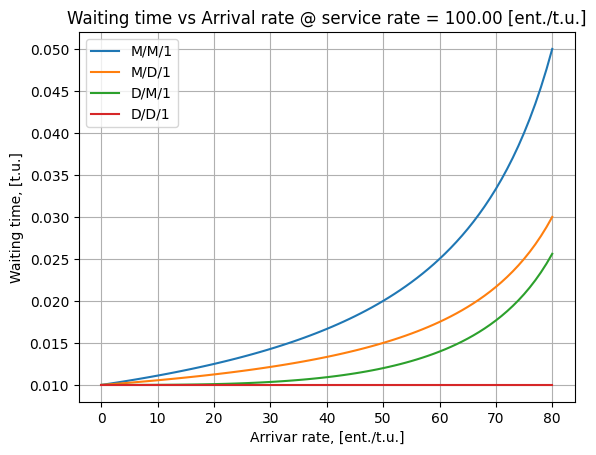

In [68]:
sr = 100
ar_array = range(0,81)

mm1_vs_ar = ssqs_ar(ar_array,sr=sr,qs="mm1")
md1_vs_ar = ssqs_ar(ar_array,sr=sr,qs="md1")
dm1_vs_ar = ssqs_ar(ar_array,sr=sr,qs="dm1")
dd1_vs_ar = ssqs_ar(ar_array,sr=sr,qs="dd1")

plt.figure()
plt.plot(gp(mm1_vs_ar,'ar'), gp(mm1_vs_ar,'w'),label="M/M/1")
plt.plot(gp(md1_vs_ar,'ar'), gp(md1_vs_ar,'w'),label="M/D/1")
plt.plot(gp(dm1_vs_ar,'ar'), gp(dm1_vs_ar,'w'),label="D/M/1")
plt.plot(gp(dd1_vs_ar,'ar'), gp(dd1_vs_ar,'w'),label="D/D/1")

plt.title("Waiting time vs Arrival rate @ service rate = %.2f [ent./t.u.]"%sr)
plt.xlabel("Arrivar rate, [ent./t.u.]")
plt.ylabel("Waiting time, [t.u.]")
plt.grid()
plt.legend()



## Find minimum number of servers to esnsure that waiting time is below critical

In [69]:
def find_min_number_of_servers_for_Wlimit(ar, sr1, slim, wlim):
    min_number = float('nan')
    for number in range(1, slim+1):
        p = 1/number
        ar1 = ar*p
        if ar1/sr1 < 1:
            params = ssqs(qs="md1", ar=ar1, sr=sr1)
            # print(number,params["w"])
            if params["w"] < wlim:
                min_number = number
                return min_number
            if number == 1 and params["w"] <= wlim:
                break
    if number == slim:
        print("slim is reached")
        return float('nan')

    return min_number


# qsysparams(c=6,b=7)
print(find_min_number_of_servers_for_Wlimit(
    ar=100, sr1=10, slim=10000, wlim=0.2))
print(ssqs(qs="md1", ar=100/3, sr=50)["w"])

16
0.04000000000000001


## Multiserver system

{'qs': 'md1', 'w': 0.10102040816326531, 'wq': 0.0010204081632653062, 'u': 0.02, 'ar': 0.2, 'sr': 10.0, 'l': 0.020204081632653064, 'lq': 0.00020408163265306126, 'a': 5.0, 's': 0.1, 'va': 25.0, 'vs': 0}
{'qs': 'mm1', 'w': 0.2, 'wq': 0.1, 'u': 0.5, 'ar': 5.0, 'sr': 10.0, 'l': 1.0, 'lq': 0.5, 'a': 0.2, 's': 0.1, 'va': 0.04000000000000001, 'vs': 0.010000000000000002}
{'qs': 'dd1', 'w': 0.1, 'wq': 0.0, 'u': 0.02, 'ar': 0.2, 'sr': 10.0, 'l': 0.020000000000000004, 'lq': 0.0, 'a': 5.0, 's': 0.1, 'va': 0, 'vs': 0}


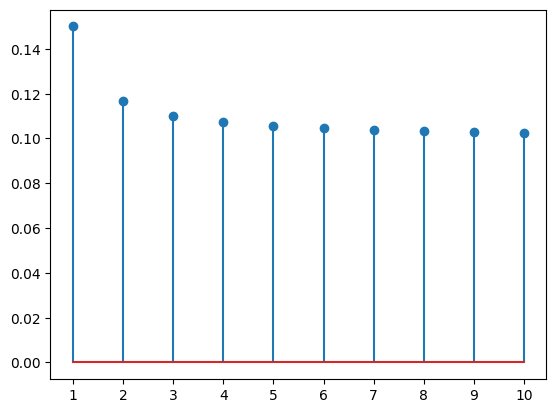

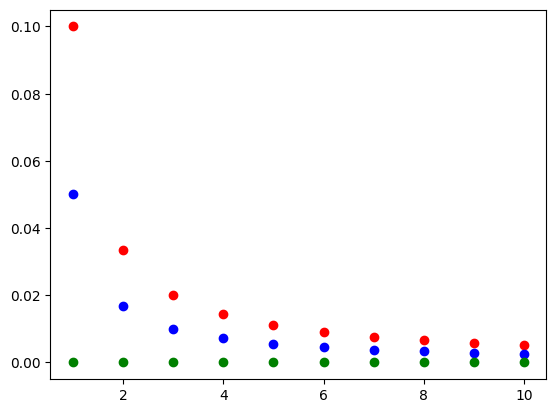

In [70]:
print(msqs(qs='md1',ar=2, sn=10, s1=0.10))
print(msqs(ar=10, sn=2, sr1=10))
print(msqs(qs='dd1',ar=2, sn=10, s1=0.10,vs=0))

sr1 = 10
ar = 5
n_max = 10
n_list = []
param_list = []
if ar>n_max*sr1:
    raise Exception('n_max is too small')
for n in range(1,n_max+1):
    if ar<n*sr1:
        n_list.append(n)
        param_list.append(msqs(ar,n,qs='md1',sr1=sr1))
# w_values = [d['w'] for d in param_list]
# print(param_list)
plt.figure()
# plt.stem(n_list,w_values)
plt.stem(n_list,[param['w'] for param in param_list])
plt.xticks(n_list);

def msqs_params_vs_n(ar,n_max,sr1,param,qs=None):
    n_list = []
    param_list = []
    if ar>n_max*sr1:
        raise Exception('n_max is too small for given ar')
    for n in range(1,n_max+1):
        if ar<n*sr1:
            n_list.append(n)
            param_list.append(msqs(ar,n,qs=qs,sr1=sr1)[param])
    return [n_list,param_list]

plt.figure()
n_list,param_list = msqs_params_vs_n(ar,n_max,sr1,param='wq',qs='mm1')
plt.plot(n_list,param_list,'ro')
n_list,param_list = msqs_params_vs_n(ar,n_max,sr1,param='wq',qs='md1')
plt.plot(n_list,param_list,'bo')
n_list,param_list = msqs_params_vs_n(ar,n_max,sr1,param='wq',qs='dd1')
plt.plot(n_list,param_list,'go')
# plt.xticks(n_list);

## Advanced multi server system evaluation

SERVER PARAMETERS

arrival rate

service rate of a server

SYSTEM Optimization CRITERIA?

number of servers

load balancing

waiting time

refill time (if limited resources are utilized)

price (may be fixed, depends on server performance, server number or utilization)


single server

find max arrival rate for given wlim and sr

find max arrival rate for given sr if limited resources are utilized (trefil is given)


multiserver

find min number of servers to guarantee wlim for given total ar, sigle server sr1

find min number of servers to guarantee wlim for given total ar, sigle server sr1 and if limited resources are utilized (trefil is given) 

cost

distribute load between diferently priced servers to minimize cost and to guarantee wlim

distribute load between diferently priced servers to minimize cost and to guarantee wlim and trefil

Multiserver
{'qs': 'MD1', 'w': 0.05571073867163252, 'wq': 0.00015518311607697082, 'u': 0.005555555555555556, 'ar': 0.1, 'sr': 18.0, 'l': 0.005571073867163253, 'lq': 1.5518311607697083e-05, 'a': 10.0, 's': 0.05555555555555555, 'va': 100.0, 'vs': 0, 'info': 'Edge 1', 'c': 10, 'tr': 1999.9999999999998, 'prob': 0.01}
{'qs': 'MD1', 'w': 0.05571073867163252, 'wq': 0.00015518311607697082, 'u': 0.005555555555555556, 'ar': 0.1, 'sr': 18.0, 'l': 0.005571073867163253, 'lq': 1.5518311607697083e-05, 'a': 10.0, 's': 0.05555555555555555, 'va': 100.0, 'vs': 0, 'info': 'Edge 2', 'c': 10, 'tr': 1999.9999999999998, 'prob': 0.01}
{'qs': 'MD1', 'w': 0.05571073867163252, 'wq': 0.00015518311607697082, 'u': 0.005555555555555556, 'ar': 0.1, 'sr': 18.0, 'l': 0.005571073867163253, 'lq': 1.5518311607697083e-05, 'a': 10.0, 's': 0.05555555555555555, 'va': 100.0, 'vs': 0, 'info': 'Edge 3', 'c': 10, 'tr': 1999.9999999999998, 'prob': 0.01}
{'qs': 'MD1', 'w': 0.05571073867163252, 'wq': 0.00015518311607697082, 'u': 0.00

Text(0, 0.5, 'W')

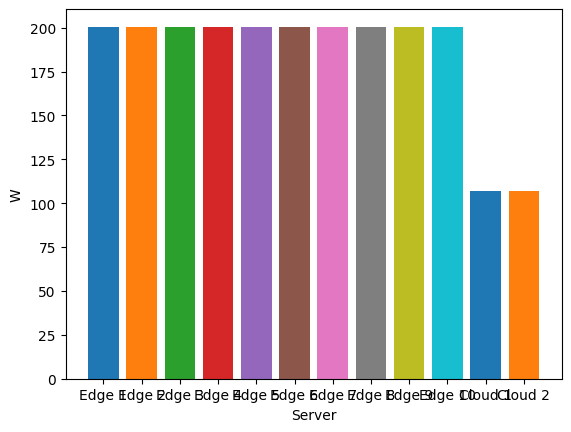

In [71]:
def multi_server_system(arrival_rate, prob_list, server_list):
    # prob_list- list of probabilities of load distribution between servers
    # server_list - list of servers with their parameters
    # if sum(prob_list) != 1:
    #     raise Exception("Sum of probalities must be equal to 1.")
    if len(prob_list) != len(server_list):
        raise Exception("Lengths of prob_list and server_list must be equal.")
    result = []
    for i in range(len(prob_list)):
        if prob_list[i]*arrival_rate < server_list[i]["sr"]:
            res = ssqs(qs=server_list[i]["qs"],
                    ar=prob_list[i]*arrival_rate,
                    sr=server_list[i]["sr"])
            if server_list[i]["info"] is not None:
                res["info"] = server_list[i]["info"]
            if server_list[i]["c"] is not None:
                res["c"] = server_list[i]["c"] 
            if server_list[i]["r"] is not None:
                res["tr"] = server_list[i]["r"]*res["s"]/res["u"]    
            res["prob"] = prob_list[i]
            result.append(res)
        else:
            print("System unstable: arrival rate > service rate")
    return result

N_E = 10
N_C = 2
N = N_E + N_C
P_E = 0.1
P_C = 1-P_E
C_E = 10
C_C = 20
s_E = 200.0/3600
s_C = 100.0/3600
R_E = 200 # resursai
R_C = float('inf')
prob_list = []
server_list = []
for i in range(N_E):
    prob_list.append(P_E*1/N_E)
    server_list.append({"qs": "MD1", "sr": 1/s_E, "info": "Edge %d"%(i+1), "c":C_E, "r":R_E})
for i in range(N_C):
    prob_list.append(P_C*1/N_C)
    server_list.append({"qs": "MD1", "sr": 1/s_C, "info": "Cloud %d"%(i+1), "c":C_C,"r":R_C})

# prob_list = [0.5, 0.5]
# server_list = [{"qs": "MM1", "sr": 10, "info": "Edge"}, {
#     "qs": "MM1", "sr": 20, "info": "Cloud"}]
print("Multiserver")
msp = multi_server_system(
    arrival_rate=10, prob_list=prob_list, server_list=server_list)
for res in msp:
    print(res)
# print(multi_server_system(arrival_rate=2, prob_list=prob_list, server_list=server_list))
plt.figure()
# plt.bar([msp[0]["Info"],msp[1]["Info"]],[msp[0]["W"],msp[1]["W"]])
Price = 0
Priceu = 0
# Trefil = 
for m in msp:
    Price += m["c"] 
    Priceu += m["c"]*m["u"] 
    plt.bar([m["info"]], [m["w"]*3600], label="$%s: \lambda = %.2f, \mu = %.2f$" % (
        m["info"], m["ar"], m["sr"]))
# plt.bar([msp[1]["Info"]],[msp[1]["W"]],label="$%s: \mu = %.2f$"%(msp[1]["Info"],msp[1]["Mu"]))
print ("Price",Price)
print ("Priceu",Priceu)
plt.xlabel("Server")
plt.ylabel("W")
# plt.legend()

In [72]:
# import matplotlib.pylab as plt
# Lambda = 0.5
# a = 1/Lambda
# v_a = a**2
# s = 1
# v_s = 0
# params = ssqs(a=a, s=a, va=v_a, vs=v_s)
# print(params)
# # print(gg1_queueing_system(a, s, v_a, v_s))

# Lambda = np.linspace(0.1, 0.9, 100)
# W_vs_Lambda_MD1 = []
# W_vs_Lambda_MM1 = []
# W_vs_Lambda_DM1 = []
# W_vs_Lambda_DD1 = []
# for l in Lambda:
#     W = ssqs(a=1/l, s=s, v_a=(1/l)**2, v_s=s**2)[0]
#     W_vs_Lambda_MM1.append(W)
#     W = ssqs(a=1/l, s=s, v_a=(1/l)**2, v_s=0)[0]
#     W_vs_Lambda_MD1.append(W)
#     W = ssqs(a=1/l, s=s, v_a=0, v_s=s**2)[0]
#     W_vs_Lambda_DM1.append(W)
#     W = ssqs(a=1/l, s=s, v_a=0, v_s=0)[0]
#     W_vs_Lambda_DD1.append(W)

# plt.figure()
# plt.plot(Lambda, W_vs_Lambda_MM1,
#          label="$M/M/1: a=1/\lambda, s=1, v_a=a^2, v_s=s^2$")
# plt.plot(Lambda, W_vs_Lambda_MD1,
#          label="$M/D/1: a=1/\lambda, s=1, v_a=a^2, v_s=0$")
# plt.plot(Lambda, W_vs_Lambda_DM1,
#          label="$D/M/1: a=1/\lambda, s=1, v_a=0, v_s=s^2$")
# plt.plot(Lambda, W_vs_Lambda_DD1,
#          label="$D/D/1: a=1/\lambda, s=1, v_a=0, v_s=0$")
# plt.grid()
# plt.xlabel("$\lambda$")
# plt.ylabel("$W$")
# plt.legend()